In [102]:
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.__version__)

2.0.0


In [103]:
housing = pd.read_csv("data.csv")

In [104]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [106]:
#housing.describe()

In [107]:
#housing.isna()

In [108]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [109]:
housing = housing.dropna()

In [110]:
#bool_series = pd.isna(housing["CRIM"])
#housing[bool_series]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BAE067788>,
      dtype=object)

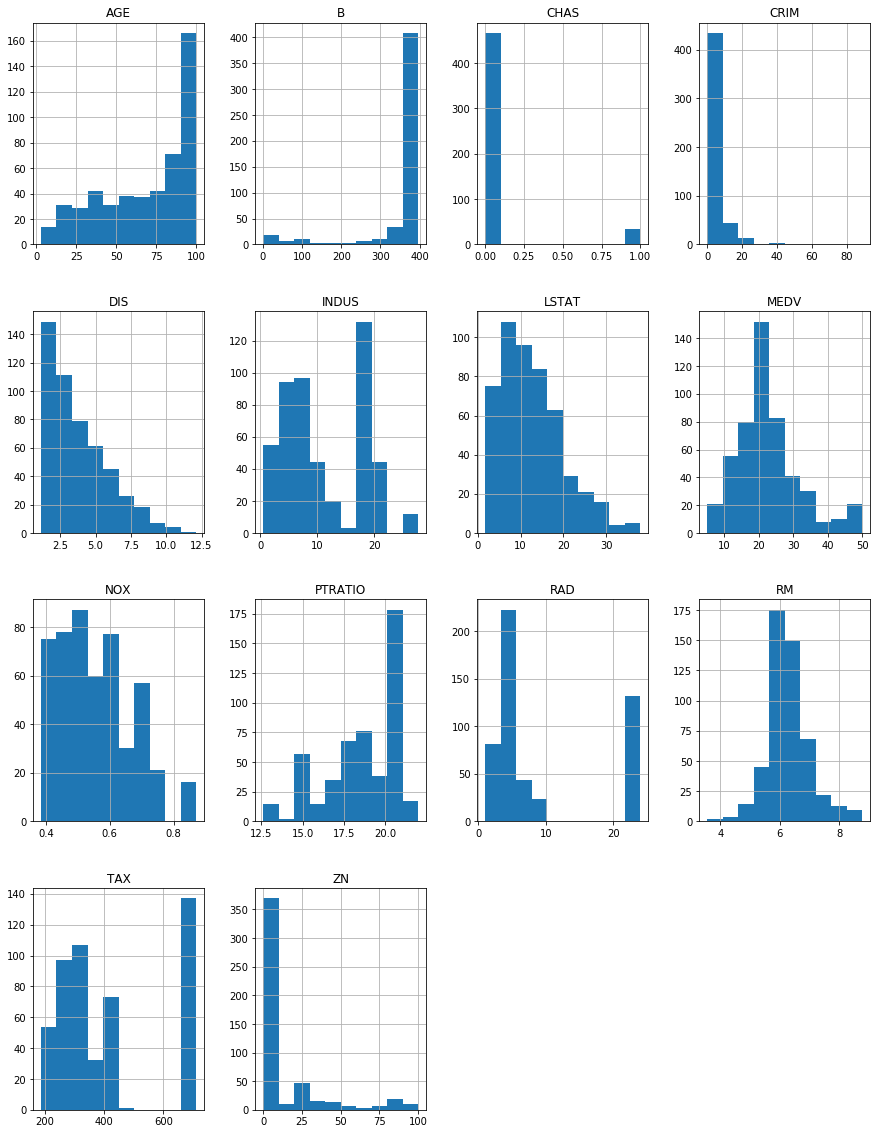

In [111]:
housing.hist(figsize = (15,20))

In [112]:
# Split csv to train and test data.

# Normally the data split between test-train is 20%-80%.
# In order to successfully implement a ML algo, 
# you need to be clear about how to split the data into testing and training.

# sklearn for the train_test_split() function, which will be used for splitting the data into the two parts.
from sklearn.model_selection import train_test_split

In [113]:
# Now, we will be splitting the data into labels and features.
# Labels are the data which we want to predict and features are the data which are used to predict labels.

labels = housing.MEDV
features = housing.drop('MEDV', axis=1)

In [114]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

# test_size=0.20 which is used to indicate that the
# test data should be 20% of the total data and rest 80% should be train data.

#The training set is a subset of the data set used to train a model.

    #x_train is the training data set.
    #y_train is the set of labels to all the data in x_train.

#The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

    #x_test is the test data set.
    #y_test is the set of labels to all the data in x_test.

#The validation set is a subset of the data set (separate from the training set) that you use to adjust hyperparameters.

    #The example you listed doesn't mention the validation set.
    
    
# Unless specified to use random_state function, train_test_split will split arrays into random subsets.

In [115]:
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)


X_train:

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
391  5.29305   0.0  18.10     0  0.700  6.051  82.5  2.1678   24  666   
20   1.25179   0.0   8.14     0  0.538  5.570  98.1  3.7979    4  307   
327  0.24103   0.0   7.38     0  0.493  6.083  43.7  5.4159    5  287   
337  0.03041   0.0   5.19     0  0.515  5.895  59.6  5.6150    5  224   
58   0.15445  25.0   5.13     0  0.453  6.145  29.2  7.8148    8  284   

     PTRATIO       B  LSTAT  
391     20.2  378.38  18.76  
20      21.0  376.57  21.02  
327     19.6  396.90  12.79  
337     20.2  394.81  10.56  
58      19.7  390.68   6.86  
(400, 13)


In [116]:
print("\ny_train:\n")
print(y_train.head())
print(y_train.shape)


y_train:

391    23.2
20     13.6
327    22.2
337    18.5
58     23.3
Name: MEDV, dtype: float64
(400,)


In [117]:
print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_test:

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
367  13.52220  0.0  18.10     0  0.631  3.863  100.0  1.5106   24  666   
76    0.10153  0.0  12.83     0  0.437  6.279   74.5  4.0522    5  398   
380  88.97620  0.0  18.10     0  0.671  6.968   91.9  1.4165   24  666   
160   1.27346  0.0  19.58     1  0.605  6.250   92.6  1.7984    5  403   
108   0.12802  0.0   8.56     0  0.520  6.474   97.1  2.4329    5  384   

     PTRATIO       B  LSTAT  
367     20.2  131.42  13.33  
76      18.7  373.66  11.97  
380     20.2  396.90  17.21  
160     14.7  338.92   5.50  
108     20.9  395.24  12.27  
(101, 13)


In [118]:
print("\ny_test:\n")
print(y_test.head())
print(y_test.shape)


y_test:

367    23.1
76     20.0
380    10.4
160    27.0
108    19.8
Name: MEDV, dtype: float64
(101,)


In [119]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 505
Data columns (total 14 columns):
CRIM       501 non-null float64
ZN         501 non-null float64
INDUS      501 non-null float64
CHAS       501 non-null int64
NOX        501 non-null float64
RM         501 non-null float64
AGE        501 non-null float64
DIS        501 non-null float64
RAD        501 non-null int64
TAX        501 non-null int64
PTRATIO    501 non-null float64
B          501 non-null float64
LSTAT      501 non-null float64
MEDV       501 non-null float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


In [120]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 13) (400,)
(101, 13) (101,)


In [121]:
corr_matrix = housing.corr()

In [122]:
corr_matrix['MEDV'].sort_values(ascending=False)
# When it is close to 1, it means that there is a strong positive correlation.
# When the coefficient is close to –1, it means that there is a strong negative correlation.
# coefficients close to zero mean that there is no linear correlation.

MEDV       1.000000
RM         0.696169
ZN         0.360031
B          0.335387
DIS        0.251709
CHAS       0.174679
AGE       -0.375437
RAD       -0.384730
CRIM      -0.390251
NOX       -0.428812
TAX       -0.471253
INDUS     -0.486625
PTRATIO   -0.511897
LSTAT     -0.737720
Name: MEDV, dtype: float64

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
predictions = model.predict(X_test)

In [126]:
predictions[0:5]

array([10.18296392, 22.90028638, 15.7250715 , 32.8687425 , 23.06305477])

Text(0, 0.5, 'Predictions')

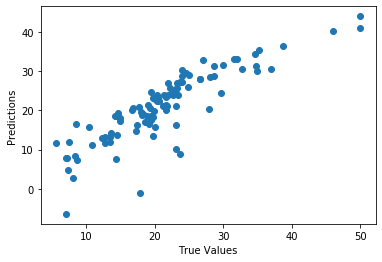

In [127]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [128]:
print("Score:", model.score(X_test, y_test))

Score: 0.7200277678580305
